# In-Class Exercise 4: Advanced Random Sampling

In this notebook, we will explore some slightly more complicated random sampling methods. 

Some of the following steps have already been incorporated into the templates as denoted by a ✅. Study these portions of the files, and make your own additions where necessary. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## I. Rejection Sampling

Consider a physical process with the probability distribution function,

$$ 
f(t) = (1-2t)sin^{2}(4πt) 
$$

on the interval $ -1 \leq t \lt 1 $.  

 - Plot this distribution ✅.
   - Is it normalized?
   - Does it need to be normalized for rejection sampling?
 - Select a bounding function for rejection sampling.  
   - What criteria must it meet?
   - Plot the bounding function with the distribution.
   - Can you think of more than one bounding function?
 - Use rejection sampling to make 10,000 successful samples using a bounding function g(t)=1.
 - Estimate your sampling efficiency ✅. 
   - How does your efficiency change if your bounding function is g(t)=5?

In [2]:
def pdf(t):
    return (1 - 2*t) * np.sin(4*np.pi*t)**2

def bounding_func(t):
    #return 3
    return -(t + 1)/2 + 3

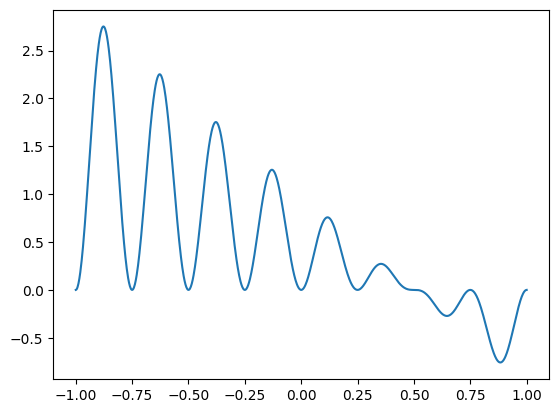

In [3]:
t = np.linspace(-1.0, 1.0, 1000, endpoint=True)
pdf_vals = (1 - 2*t) * np.sin(4*np.pi*t)**2
plt.plot(t, pdf_vals)
plt.show()

In [4]:
def rejectionSampling(t_min, t_max, bounding_func, pdf):
    """A rejection sampline routine over the domain [t_min, t_max]
    
    Parameters
    ----------
    t_min : float
        The lower bound of the sampling domain
    t_max : float
        The upper bound of the sampling domain
    bounding_func : function
        The bounding function for rejection sampling
    pdf : function
        The PDF we're sampling
        
    Returns
    -------
    
    bool : Whether or not the sample is accepted
    """
    # sample a random value over the domain
    xp = ...
    # evaluate the bounding function at the sampled value
    g = ...
    # evalueate the pdf function at the sampled value
    f = ...
    # sample another random number to determine whether or not to keep the sample
    xq = ...

    # decide whether to accept or reject this sample
    keep_sample = ...
    
    return keep_sample

## II. Histogram Sampling

Lines 6-8 of exercise4_II.m define a five-bin histogram PDF between x=0 and x=10. 

Use the outline below as a guide to perform histogram sampling for this PDF. Remember, histogram sampling is a two-step process involving both direct discrete sampling and direct continuous sampling. Fill in the missing parts of the function `sampleHist` according to the following steps:

1. Discrete sampling: Select one of the uniform bins in the histogram based on the relative areas represented by each histogram bin
  1. Create a column vector, w, that contains N bin widths.
  2. Create a column vector, a, that contains N bin areas.
  3. Normalize a (area vector) to generate the normalized PDF probabilities, pdf.
  4. Generate the CDF, cdf.
  5. Search the CDF to determine which bin, k, is sampled. This will look just like the direct discrete random sampling exercise from In-Class Exercise #3.
  
2. Continuous sampling: Now that one of the bins has been chosen, sample within that uniform, continuous bin to yield a final sample
  1. Generate a new random number, rn2.
  2. Use rn2 to sample the shifted uniform distribution, giving sampledVar.
  3. Generate 1000 samples and plot a histogram of your results ✅.  Does it match your expectations?

In [5]:
def sampleHist(x, f, prn):
    """Sample a histogram using a random variable
    
    Parameters
    ----------
    x : Iterable of float
        The domain values of the function, f
    f : Iterable of float
        The function values corresponding to domain values, x
    prn : float
        A random variable in the interval [0, 1)
        
    Returns
    -------
    float : the sampled value
    """
    # some value checking to start
    if len(x) < 2:
        raise ValueError('There must be at least 2 histogram boundaries')
    if len(x) != len(f) + 1:
        raise ValueError(f'The size of the histogram boundaries {len(x)} must be one larger than the list of probabilities {len(f)}')
    if prn < 0 or prn > 1:
        raise ValueError(f'The random variable {prn} must be between zero and one.')
    
    out = 0.0
    
    # create an array of bin widths
    widths = ...
    
    # create an arrray of areas within each bin
    areas = ...
    
    # normalize the array of areas to form a normalized discrete PDF
    pdf = ...
    cdf = ...
    
    # find the bin for the random number in the CDF
    k = ...
    
    # generate a new random number projected onto the histogram domain
    rn2 = ...
    
    # sample the histogram bin of the original histogram domain
    out = ...
    
    return out

## III. Piecewise Linear Sampling

The cell below defines a five-section piecewise linear PDF between $x=0$ and $x=100$. 
Use the outline below as a guide to perform piecewise linear sampling for this PDF.

Remember, piecewise sampling is a multi-step process involving both direct discrete sampling and direct continuous sampling. Fill in the missing parts of the `samplePWLinear` function, outlined in the cell below, according to the following steps:

1. Discrete sampling: Select one of the piecewise portions based on the relative areas represented by each bin.
   1.Create a column vector, w, that contains N bin widths.
   2. Create a column vector, h, that contains the N average bin heights.
   3. Create a column vector, a, that contains N bin areas.
   4. Normalize a (area vector) to generate the normalized PDF probabilities, pdf.
   5. Generate the CDF, cdf.
   6. Search the CDF using discrete sampling to determine which bin, k, is sampled.
2. Discrete sampling: Select either the triangle or lower rectangle area based on their relative areas in the same piecewise linear portion.
   1. For each piecewise portion, calculate the area of the lower rectangle, ar.
   2. For each piecewise portion, determine the probability of choosing the rectangle (relative to its accompanying triangle), pr.
   3. Generate a new random number, rn2.
   4. Use rn2 to sample whether the rectangle or triangle is to be used in the next step.
3. Continuous sampling: Now a specific portion of a single piecewise bin has been selected. Given which shape was chosen (rectangle or triangle), sample the continuous bin using the appropriate underlying PDF (either shifted uniform or shifted linear) to yield a final sample
   1. Generate a new random number, rn3.
   2. Use rn3 to return a final sample, sampledVar. The exact method will depend on whether the rectangle or triangle was selected in the steps above.
   3. Generate 218 samples and plot a histogram of your results ✅.  Does it match your expectations?

In [ ]:
# try this simple distribution first...
x = np.asarray([0.0, 0.25, 0.6, 1.0])
f = np.asarray([0.0, 6.0, 10.0, 7.0])
# then uncomment and try this randomized one
# np.random.seed(100)
# x = np.sort(np.random.rand(10))
# f = 10 * np.random.rand(10)

plt.plot(x, f)
plt.show()

In [6]:
def samplePWLinear(x, f, prn):
    """Sample a piecewise linear PDF using a random variable
    
    Parameters
    ----------
    x : Iterable of float
        The domain values of the function, f
    f : Iterable of float
        The function values corresponding to domain values, x
    prn : float
        A random variable in the interval [0, 1)
        
    Returns
    -------
    float : the sampled value
    """
    # some value checking
    if len(x) < 3:
        raise ValueError('There must be at least 3 points in the domain')
    if len(x) != len(f):
        raise ValueError(f'The number of domain points ({len(x)}) and PDF points ({len(f)}) must be the same')
    if prn < 0.0 or prn > 1.0:
        raise ValueError(f'The random variable ({prn}) must be between 0 and 1')

    # create an array of bin widths
    widths = ...
    # create an array of bin heights
    heights = ...
    
    # create an array of areas of each bin
    areas = ...
    
    # normalize the array of areas to form a discrete PDF
    pdf = ...
    cdf = ...
    
    # sample the discrete PDF
    k = ...
    
    # for each bin determine the size of the rectangle
    bin_areas = np.zeros(len(areas))
    for i in range(len(areas)):
        bin_areas[i] = ...
        
    # convert rectangle area to rectangle probability
    rect_prob = ...
    
    # generate a new random number
    rn2 = ...
    
    # choose the rectangle or triangle
    if ...:
        # generate a new random number
        rn3 = ...
        
        # sample the uniform distribution of the rectangle
        out = ...
    else:
        # generate a new random number
        rn3 = ...
        
        # sample the triangle bin, taking care to 
        # account for both positive and negative slope
        out = ...
        
    return out

In [ ]:
h, bins = np.histogram(samples, 50)
h = f.max() * h.astype(float) / h.max()
plt.stairs(h, bins)
plt.plot(x, f)
plt.show()